In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy import stats

In [7]:
df = pd.read_csv("exams.csv")

Initial Data:
   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          

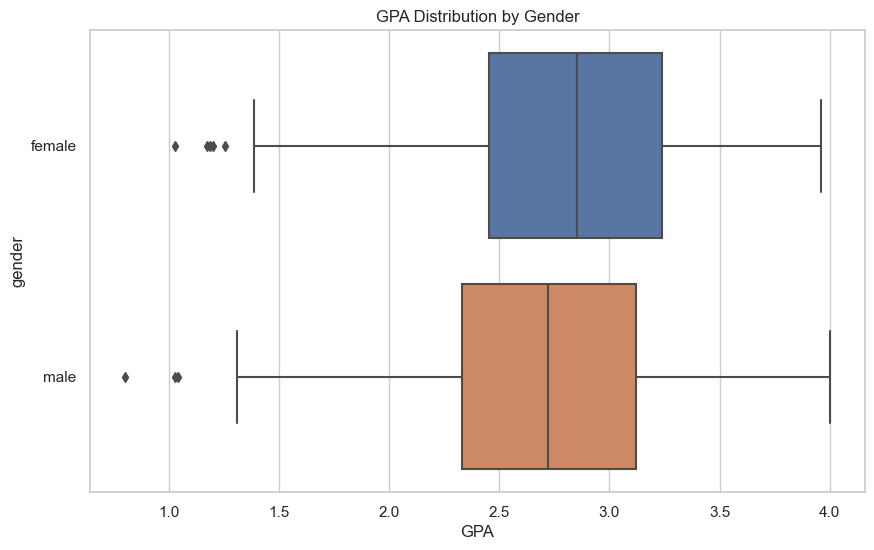

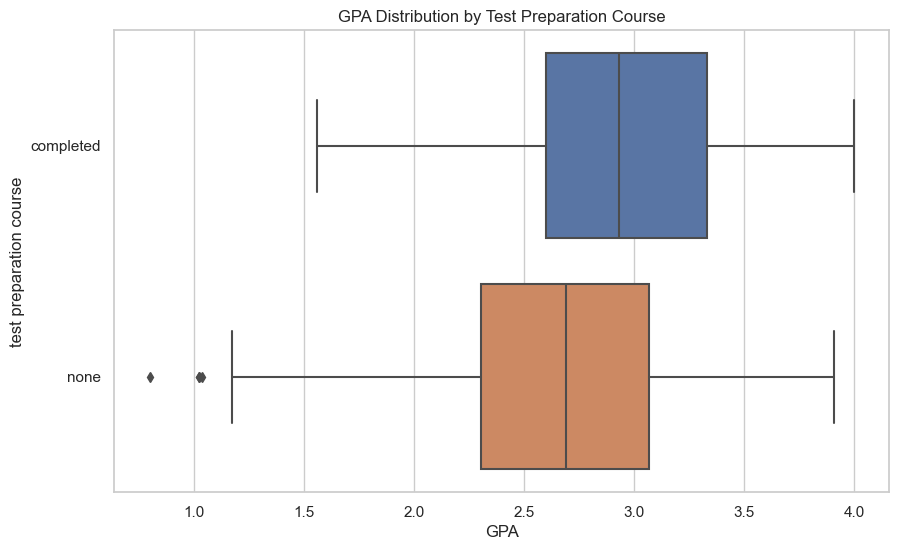

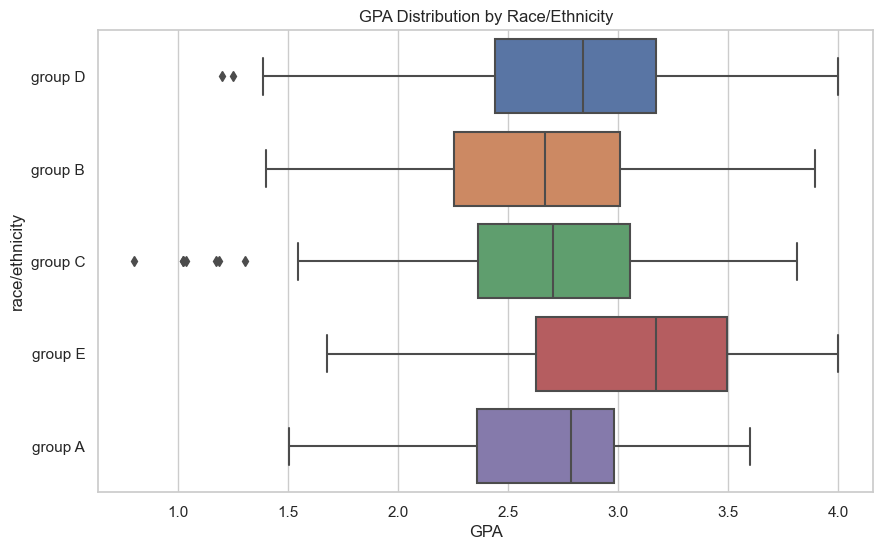

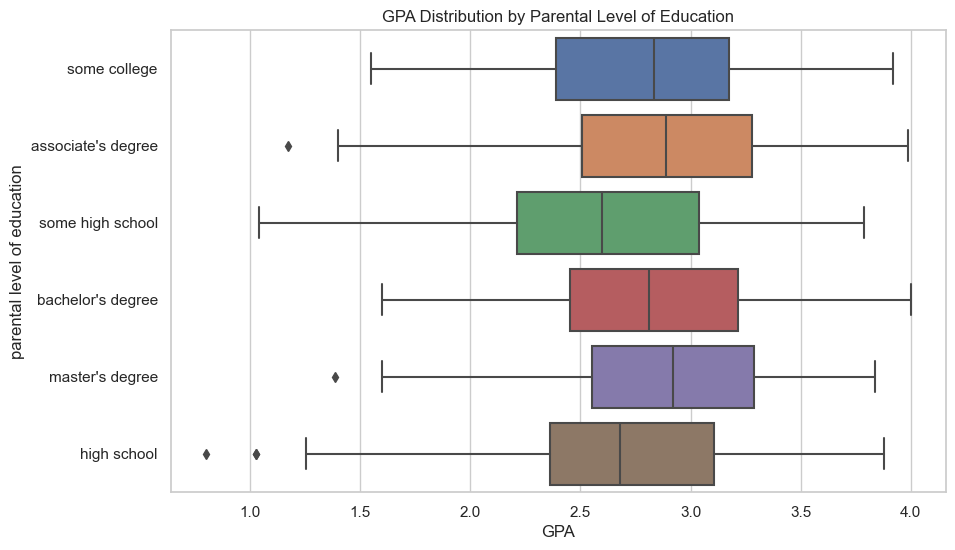

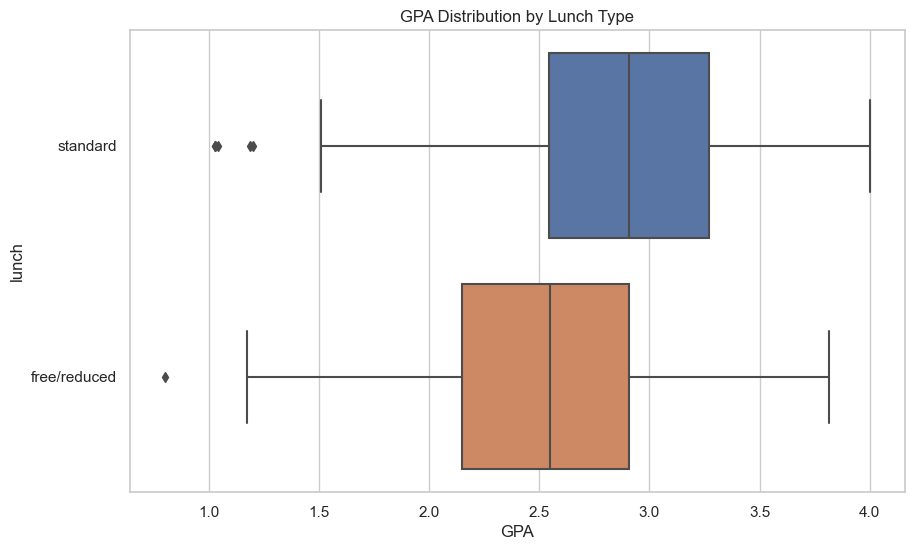

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
df = pd.read_csv("exams.csv")
# Display initial data
print("Initial Data:")
print(df.head())
print("\nData Information:")
print(df.info())

# Calculate GPA from test scores
# Assuming test score columns are named 'math score', 'reading score', and 'writing score'
test_score_columns = ['math score', 'reading score', 'writing score']

# Calculate the GPA (assuming scores are out of 100)
df['GPA'] = df[test_score_columns].mean(axis=1) / 25





# Descriptive Statistics
print("\nDescriptive Statistics of GPA:")
print(df['GPA'].describe())

# Visualizations

# Boxplot of GPA by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='gender', data=df)
plt.title('GPA Distribution by Gender')
plt.show()

# Boxplot of GPA by test preparation course
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='test preparation course', data=df)
plt.title('GPA Distribution by Test Preparation Course')
plt.show()

# Boxplot of GPA by race/ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='race/ethnicity', data=df)
plt.title('GPA Distribution by Race/Ethnicity')
plt.show()

# Boxplot of GPA by parental level of education
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='parental level of education', data=df)
plt.title('GPA Distribution by Parental Level of Education')
plt.show()

# Boxplot of GPA by lunch type
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='lunch', data=df)
plt.title('GPA Distribution by Lunch Type')
plt.show()

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# Function to perform z-test
def z_test(sample1, sample2):
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)
    pooled_se = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    z_stat = (mean1 - mean2) / pooled_se
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    return z_stat, p_value
# Hypothesis Testing
# Example: Do students with and without test preparation course have different average GPAs?
test_preparation_course_gpa = df[df['test preparation course'] == 'completed']['GPA']
no_test_preparation_course_gpa = df[df['test preparation course'] == 'none']['GPA']

z_stat, p_value = z_test(test_preparation_course_gpa, no_test_preparation_course_gpa)
print(f'Z-statistic for test preparation course: {z_stat}, P-value: {p_value}')

# Additional hypothesis testing for other variables
# Example: Gender
male_gpa = df[df['gender'] == 'male']['GPA']
female_gpa = df[df['gender'] == 'female']['GPA']

z_stat, p_value = z_test(male_gpa, female_gpa)
print(f'Z-statistic for gender: {z_stat}, P-value: {p_value}')





Z-statistic for test preparation course: 7.755533073462701, P-value: 8.881784197001252e-15
Z-statistic for gender: -3.2343004564017974, P-value: 0.0012194109831629163


Initial Data:
   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score       GPA  
0               completed          59             70             78  2.760000  
1                    none          96             93             87  3.680000  
2                    none          57             76             77  2.800000  
3                    none          70             70             63  2.706667  
4                    none          83             85             86  3.386667  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 

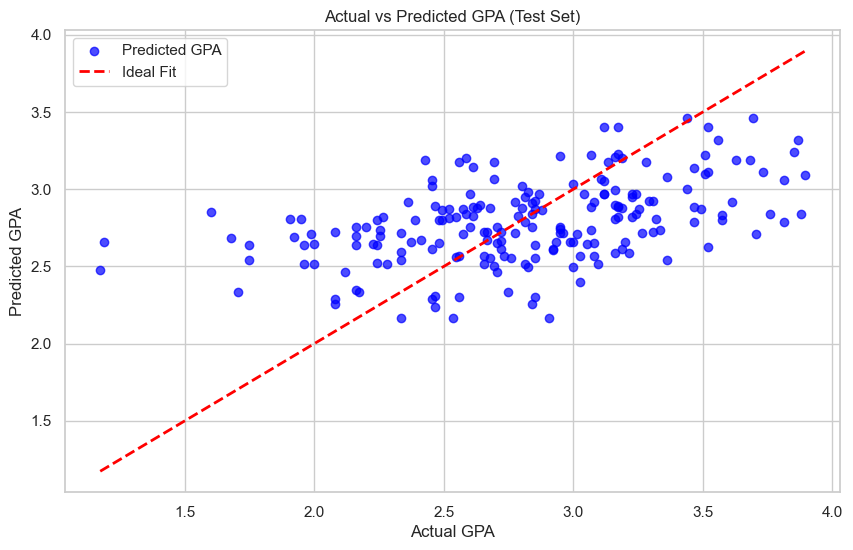

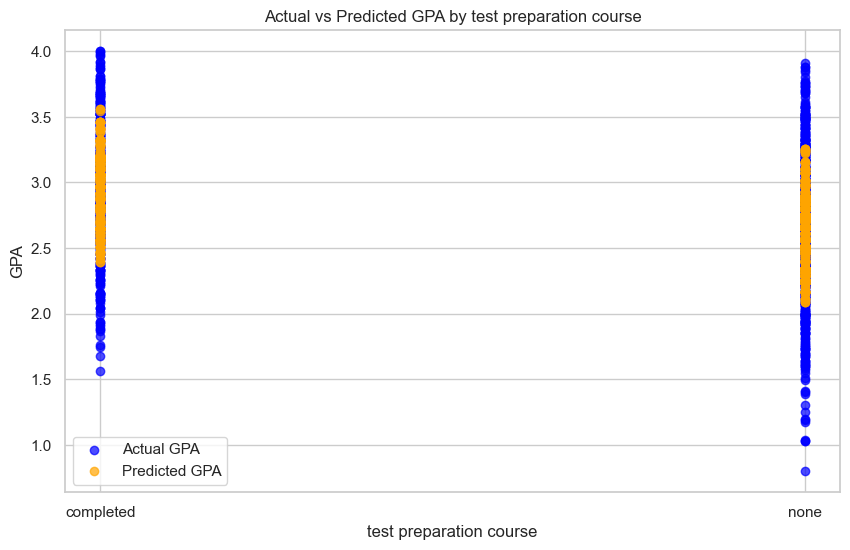

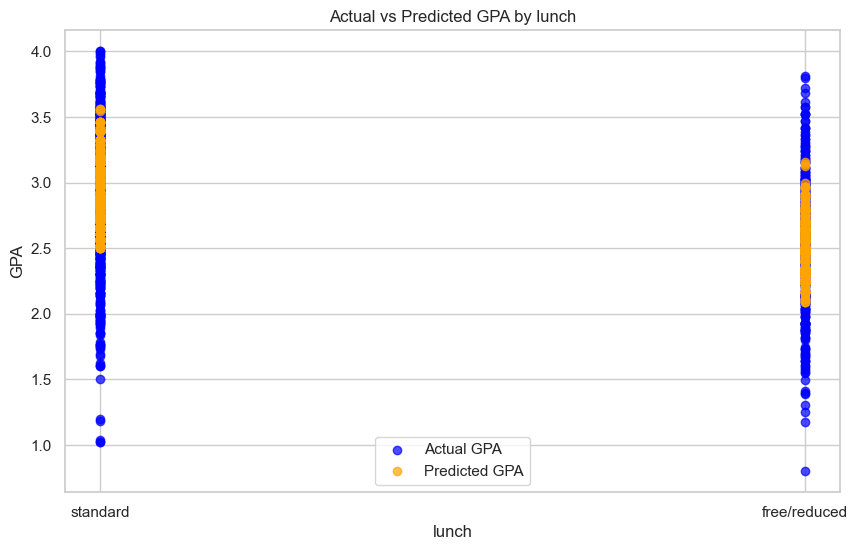

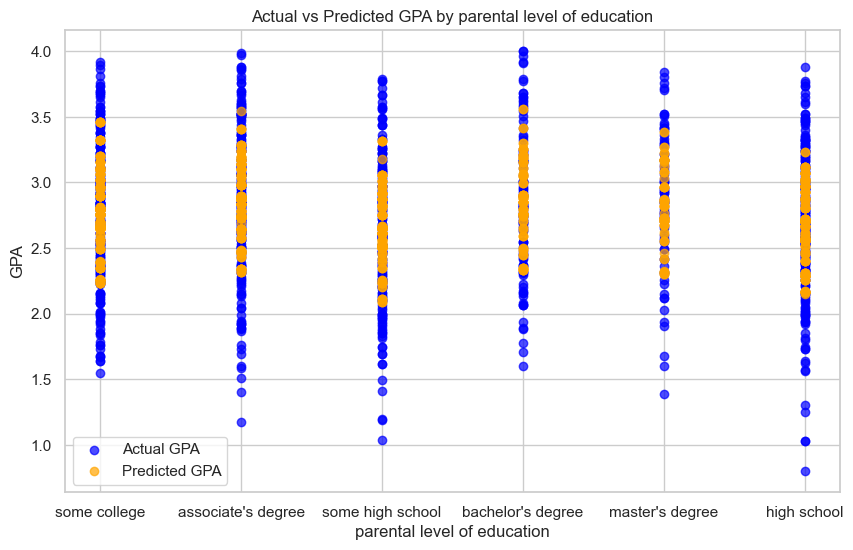

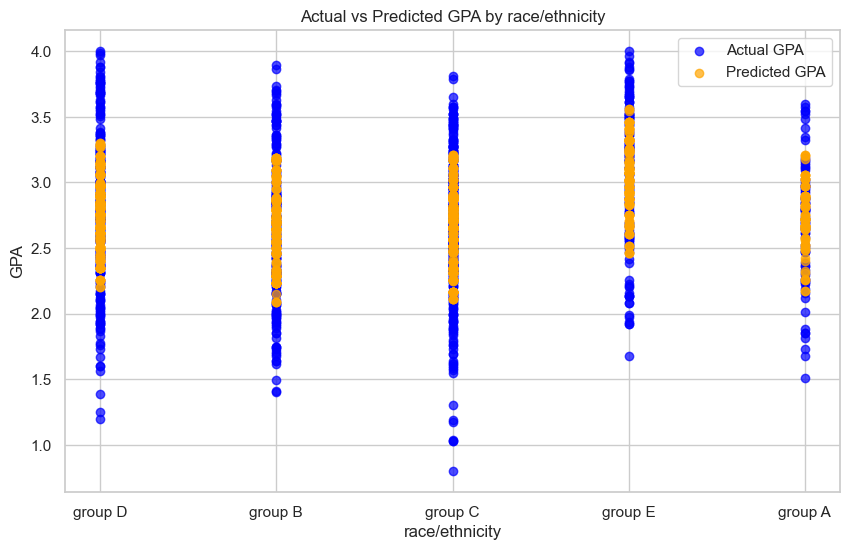

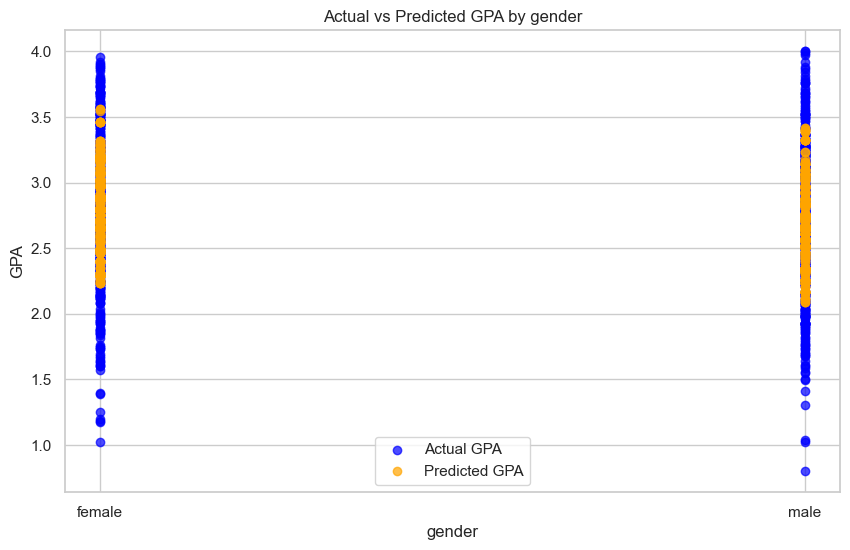

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor     # stochastic gradient descent (SGD) regression model
from sklearn.preprocessing import StandardScaler  # z-score normalization
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=2)



# Display initial data
print("Initial Data:")
print(df.head())
print("\nData Information:")
print(df.info())

# Calculate GPA from test scores
test_score_columns = ['math score', 'reading score', 'writing score']
df['GPA'] = df[test_score_columns].mean(axis=1) / 25

# Prepare the data for regression analysis
X_features = ['test preparation course', 'lunch', 'parental level of education', 'race/ethnicity', 'gender']

# Apply one-hot encoding to the categorical variables
df_encoded = pd.get_dummies(df, columns=X_features, drop_first=True)

# Define the independent variables (X) and dependent variable (y)
X = df_encoded.drop(columns=['GPA', 'math score', 'reading score', 'writing score'])  # Exclude GPA and test scores
y = df_encoded['GPA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Fit the regression model using SGDRegressor
sgdr = SGDRegressor(max_iter=1000, tol=1e-3)
sgdr.fit(X_train_scaled, y_train)

# Print model information
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

# Get model parameters
b_norm = sgdr.intercept_    # bias (intercept)
w_norm = sgdr.coef_         # coefficients (weights)

print(f"Model parameters:\nCoefficients: {w_norm}\nIntercept: {b_norm}")

# Make predictions using sgdr.predict() and manual calculation
y_train_pred_sgd = sgdr.predict(X_train_scaled)
y_train_pred = np.dot(X_train_scaled, w_norm) + b_norm

# Check if predictions match
print(f"Prediction using np.dot() and sgdr.predict match: {(y_train_pred == y_train_pred_sgd).all()}")

# Print predictions and target values
print(f"Predictions on training set:\n{y_train_pred[:4]}")
print(f"Target values:\n{y_train[:4]}")

# Plot actual vs predicted GPA values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, sgdr.predict(X_test_scaled), alpha=0.7, color='blue', label='Predicted GPA')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA (Test Set)')
plt.legend()
plt.show()

# Plot actual vs predicted GPA values for each feature
for feature in X_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['GPA'], alpha=0.7, color='blue', label='Actual GPA')
    plt.scatter(df[feature], sgdr.predict(scaler.transform(df_encoded.drop(columns=['GPA', 'math score', 'reading score', 'writing score']))), alpha=0.7, color='orange', label='Predicted GPA')
    plt.xlabel(feature)
    plt.ylabel('GPA')
    plt.title(f'Actual vs Predicted GPA by {feature}')
    plt.legend()
    plt.show()